
# RecSys Project 1 - Data Preprocessing

In this notebook, I will build a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. It is not a true robust recommendation system, to describe it more accurately, it just tells you what movies/items are most similar to your movie choice.

dataset: 

https://github.com/99xt/scikit-recommender-api/tree/master/db

http://files.grouplens.org/datasets/movielens/ml-100k.zip



## Import Libraries

In [2]:
import numpy as np
import pandas as pd

## Get the Data

In [155]:
# Check user data
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df_u = pd.read_csv('u.data', sep='\t', names=column_names)
df_u['timestamp'] = pd.to_datetime(df_u['timestamp']) 

In [156]:
df_u.head()

,user_id,item_id,rating,timestamp
0,0,50,5,1970-01-01 00:00:00.881250949
1,0,172,5,1970-01-01 00:00:00.881250949
2,0,133,1,1970-01-01 00:00:00.881250949
3,196,242,3,1970-01-01 00:00:00.881250949
4,186,302,3,1970-01-01 00:00:00.891717742


In [157]:
# check # of unique usrer
df_u.user_id.nunique()

944

In [161]:
df_u.item_id.nunique()

1682

In [160]:
df_u.shape

(100003, 4)

In [158]:
# get the movie titles
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [159]:
# check # of unique movie titles
movie_titles.title.nunique()

1664

In [12]:
# merge user data with movie title on item_id
df = pd.merge(df_u,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,1970-01-01 00:00:00.881250949,Star Wars (1977)
1,290,50,5,1970-01-01 00:00:00.880473582,Star Wars (1977)
2,79,50,4,1970-01-01 00:00:00.891271545,Star Wars (1977)
3,2,50,5,1970-01-01 00:00:00.888552084,Star Wars (1977)
4,8,50,5,1970-01-01 00:00:00.879362124,Star Wars (1977)


In [162]:
# check data shape
df.shape, df.user_id.nunique(), df.item_id.nunique()

((100003, 5), 944, 1682)

# EDA



## Data Visualization 

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Let's create a ratings dataframe with average rating and number of ratings:

In [22]:
# sort movie title by highest rated
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [23]:
# sort movie title by most viewed
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [108]:
# sort user id by highest avg rating
df.groupby('user_id')['rating'].mean().sort_values(ascending=False).head()

user_id
849    4.869565
688    4.833333
507    4.724138
628    4.703704
928    4.687500
Name: rating, dtype: float64

In [202]:
# sort user id by viewing most movies
df.groupby('user_id')['rating'].count().sort_values(ascending=False).head()

user_id
405    737
655    685
13     636
450    540
276    518
Name: rating, dtype: int64

In [203]:
df.groupby('title')['rating'].agg(['mean','count']).sort_values(by=['count', 'mean'],ascending=False).head()

,mean,count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [194]:
df[df['user_id']==405].groupby('rating')['rating'].count()

rating
1    485
2     73
3     63
4     48
5     68
Name: rating, dtype: int64

In [195]:
# Take both 'most viewed' and 'highest rated' into account
df.groupby('user_id')['rating'].agg(['mean','count']).sort_values(by=['count','mean'],ascending=False).head()

,mean,count
user_id,,
405,1.834464,737
655,2.908029,685
13,3.097484,636
450,3.864815,540
276,3.465251,518


In [204]:
# create a DataFrame, instead of Series
ratings_mv = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings_mv.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [197]:
# create a DataFrame, instead of Series
ratings_user = pd.DataFrame(df.groupby('user_id')['rating'].mean())
ratings_user.head()

,rating
user_id,
0,3.666667
1,3.610294
2,3.709677
3,2.796296
4,4.333333


In [209]:
# Count ratings of each title
ratings_mv['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings_mv.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [199]:
# Count ratings of each title
ratings_user['num of ratings'] = pd.DataFrame(df.groupby('user_id')['rating'].count())
ratings_user.head()

,rating,num of ratings
user_id,,
0,3.666667,3
1,3.610294,272
2,3.709677,62
3,2.796296,54
4,4.333333,24


In [200]:
df.groupby('title')['rating'].agg(['mean','count']).sort_values(by=['count', 'mean'],ascending=False).head()

,mean,count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [215]:
ratings_mv.sort_values('num of ratings',  ascending=False).head(30)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Text(0.5, 1.0, 'histogram for the number of scores each movie received')

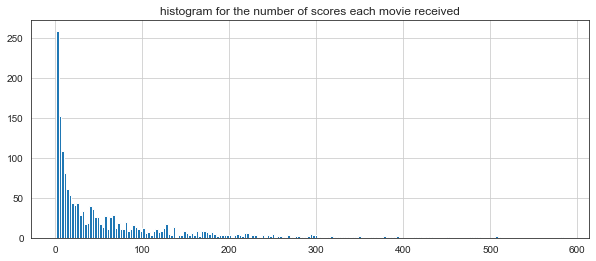

In [219]:
# check histograms
plt.figure(figsize=(10,4))
ratings_mv['num of ratings'].hist(bins=200);
plt.title('histogram for the number of scores each movie received')

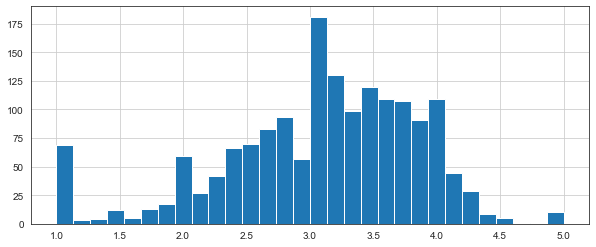

In [190]:
plt.figure(figsize=(10,4))
ratings_mv['rating'].hist(bins=30);

Text(0.5, 1.0, 'histogram of the number of movies each user watched')

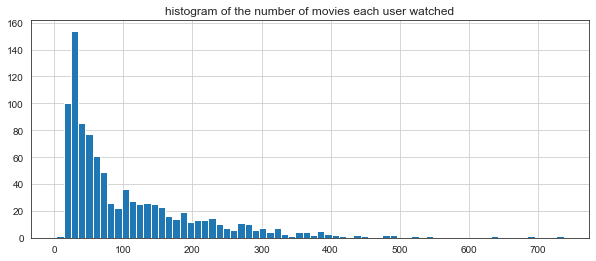

In [220]:
# check histograms
plt.figure(figsize=(10,4))
ratings_user['num of ratings'].hist(bins=70);
plt.title('histogram of the number of movies each user watched')

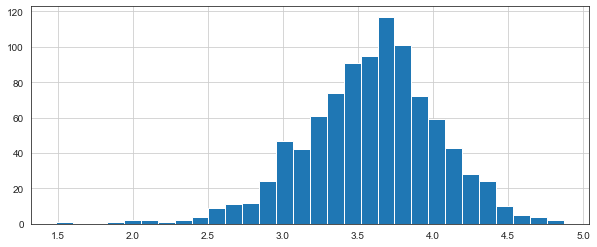

In [119]:
plt.figure(figsize=(10,4))
ratings_user['rating'].hist(bins=30);

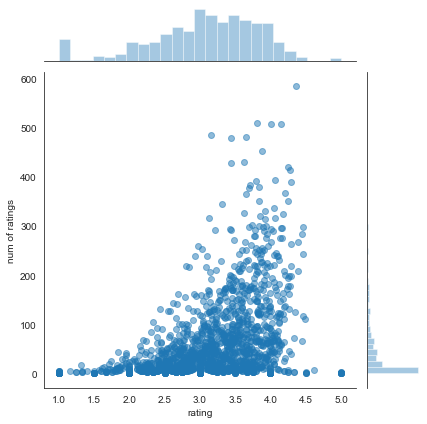

In [120]:
# joint dist of movir rating and count
sns.jointplot(x='rating', y='num of ratings',data=ratings_mv, alpha=0.5);

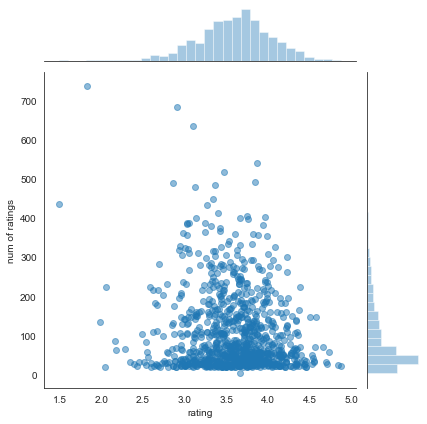

In [122]:
# joint dist of user rating and count
sns.jointplot(x='rating', y='num of ratings',data=ratings_user, alpha=0.5);

## Recommending Similar Movies

Here I will create a user-item matrix.   
The movie title on x-axis and the user ids on y-axis.   
Each cell consists of the rating the user gave to that movie.    
Note there will be a lot of NaN values, because most people only seen few of the movies.   

In [41]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,1970-01-01 00:00:00.881250949,Star Wars (1977)
1,290,50,5,1970-01-01 00:00:00.880473582,Star Wars (1977)
2,79,50,4,1970-01-01 00:00:00.891271545,Star Wars (1977)
3,2,50,5,1970-01-01 00:00:00.888552084,Star Wars (1977)
4,8,50,5,1970-01-01 00:00:00.879362124,Star Wars (1977)


In [123]:
# moviemat = df.pivot_table(index='user_id',columns='item_id',values='rating')
# moviemat.head()

In [223]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
usermat1 = df.pivot_table(index='title',columns='user_id',values='rating')

In [229]:
# usermat = df.pivot_table(index='title',columns='user_id',values='rating')

usermat = moviemat.transpose()
usermat.head()

user_id,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,5.0,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
usermat.equals(usermat1)

True

In [72]:
print("number of users:", moviemat.shape[0])
print("number of titles:", moviemat.shape[1])

number of users: 944
number of titles: 1664


In [134]:
ratings_mv.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [135]:
ratings_user.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
user_id,,
405,1.834464,737
655,2.908029,685
13,3.097484,636
450,3.864815,540
276,3.465251,518
416,3.845842,493
537,2.865306,490
303,3.365702,484
234,3.122917,480


Now let's grab the user ratings for those two movies:

In [231]:
# I choose two movies: starwars, 'a sci-fi movie', and Liar Liar, 'a comedy'
starwars_user_ratings = moviemat['Star Wars (1977)']
# liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [235]:
type(moviemat['1-900 (1994)'])

pandas.core.series.Series

In [237]:
type(moviemat[['1-900 (1994)']])

pandas.core.frame.DataFrame

We can then use corrwith() method to get correlations between two pandas series:

In [274]:
user_10 = usermat[9]
user_10.head()

title
'Til There Was You (1997)   NaN
1-900 (1994)                NaN
101 Dalmatians (1996)       NaN
12 Angry Men (1957)         NaN
187 (1997)                  NaN
Name: 9, dtype: float64

```python
df1 = pd.DataFrame({"A":[1, 5, 7, 8],  
                    "B":[5, 8, 4, 3], 
                    "C":[10, 4, 9, 3]}) 
df2 = pd.DataFrame({"A":[5, 3, 6, 4], 
                    "B":[11, 2, 4, 3], 
                    "C":[4, 3, 8, 5]}) 
print(df1, "\n") 
print(df2) 
# row-wise correlation 
df1.corrwith(df2, axis = 0)
>>>
A   -0.041703
B   -0.151186
C    0.395437
dtype: float64
# column-wise correlation 
df1.corrwith(df2, axis = 1) 
>>>
0   -0.195254
1   -0.970725
2    0.993399
3    0.000000
dtype: float64

```


In [239]:
# import warnings
# warnings.filterwarnings("ignore")

In [253]:
# similarity between movie titles in terms of user ratings.
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [254]:
similar_to_user100 = usermat.corrwith(user_100)
similar_to_user100

user_id
0           NaN
1      0.246336
2      0.010714
3     -0.005397
4      0.253876
         ...   
939    0.217267
940    0.290390
941    0.167203
942    0.225557
943    0.243045
Length: 944, dtype: float64

In [275]:
# Remove NaN and save to DataFrame
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.sort_values('Correlation', ascending = False).head()

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


In [276]:
corr_user10 = pd.DataFrame(similar_to_user100,columns=['Correlation'])
corr_user10.dropna(inplace=True)
corr_user10.tail()

,Correlation
user_id,
939,0.217267
940,0.290390
941,0.167203
942,0.225557
943,0.243045


In [277]:
# Sort by correlation and get the most to least similar movie, but seems not work well...
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [266]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [267]:
ratings_mv

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [278]:
# Filter out movies that have less than 100 reviews.
corr_starwars = corr_starwars.join(ratings_mv )
corr_starwars.head()

,Correlation,rating,num of ratings
title,,,
'Til There Was You (1997),0.872872,2.333333,9
1-900 (1994),-0.645497,2.600000,5
101 Dalmatians (1996),0.211132,2.908257,109
12 Angry Men (1957),0.184289,4.344000,125
187 (1997),0.027398,3.024390,41


In [281]:
corr_user10 = corr_user10.join(ratings_user)
corr_user10.head()

,Correlation,rating,num of ratings
user_id,,,
1,0.246336,3.610294,272
2,0.010714,3.709677,62
3,-0.005397,2.796296,54
4,0.253876,4.333333,24
5,0.426949,2.874286,175


Now sort the values and notice how the titles make a lot more sense:

In [282]:
# filter out the other titles with # of ratings greater than 100
rec_on_starwars = corr_starwars[(corr_starwars['num of ratings']>100) & (corr_starwars.index != 'Star Wars (1977)')].\
sort_values('Correlation',ascending=False)

In [283]:
list(rec_on_starwars.head(10).index)

['Empire Strikes Back, The (1980)',
 'Return of the Jedi (1983)',
 'Raiders of the Lost Ark (1981)',
 'Austin Powers: International Man of Mystery (1997)',
 'Sting, The (1973)',
 'Indiana Jones and the Last Crusade (1989)',
 'Pinocchio (1940)',
 'Frighteners, The (1996)',
 'L.A. Confidential (1997)',
 'Wag the Dog (1997)']

In [284]:
# filter out the other titles with # of ratings greater than 100
rec_on_starwars = corr_starwars[(corr_starwars['num of ratings']>200) & (corr_starwars.index != 'Star Wars (1977)')].\
sort_values('Correlation',ascending=False)
list(rec_on_starwars.head(10).index)

['Empire Strikes Back, The (1980)',
 'Return of the Jedi (1983)',
 'Raiders of the Lost Ark (1981)',
 'Sting, The (1973)',
 'Indiana Jones and the Last Crusade (1989)',
 'L.A. Confidential (1997)',
 'E.T. the Extra-Terrestrial (1982)',
 'Batman (1989)',
 'Field of Dreams (1989)',
 'Star Trek: The Wrath of Khan (1982)']

# top N hit rate

In [285]:
# filter out the other titles with # of ratings greater than 100
sim_on_user10 = corr_user10[(corr_user100['num of ratings']>100) & (corr_user10.index != 99)].\
sort_values('Correlation',ascending=False)

In [286]:
list(sim_on_user100.head(10).index)

[890, 851, 145, 748, 863, 466, 397, 660, 301, 622]